In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# dataset_name = "VIDIT"
# dataset_name = "SID2"
# dataset_name = "synthetic"
dataset_name = "outdoor"
normalize = 0
n_epochs_fine_tuning = 10

In [21]:
# file_paths = ["./test_predictions_only_light_fine_tuning_" + dataset_name + 
#                                       "/plots/angular_errors.csv",
#               "./test_predictions_phong_plus_fine_tuning_" + dataset_name + "/plots/angular_errors.csv"
#               ]


# file_paths = ["./test_predictions_phong_plus_no_fine_tuning_" + dataset_name + "/plots/angular_errors.csv",
#               "./test_predictions_phong_plus_fine_tuning_10_epochs_" + dataset_name + "/plots/angular_errors.csv",
#               "./test_predictions_phong_plus_fine_tuning_" + dataset_name + "/plots/angular_errors.csv"
#               ]


file_paths = ["./test_predictions_only_light_" + dataset_name + "/plots/angular_errors.csv",
              "./test_predictions_phong_plus_" + dataset_name + "/plots/angular_errors.csv"
              ]

# file_paths = ["./test_predictions_only_light_model_fine_tuning_" + str(n_epochs_fine_tuning)+ "_epochs_" + dataset_name + "/plots/angular_errors.csv",
#               "./test_predictions_phong_plus_fine_tuning_" + str(n_epochs_fine_tuning) + "_epochs_" + dataset_name + "/plots/angular_errors.csv"
#               ]

# file_paths = ["./test_predictions_only_light_full_train_" + dataset_name + "/plots/angular_errors.csv",
#               "./test_predictions_phong_plus_full_train_" + dataset_name + "/plots/angular_errors.csv"
#               ]

lines_files = {}
for file_path in file_paths:
    with open(file_path, 'r') as f:
        lines = f.readlines()
        lines = lines[2:]
        lines_files[file_path] = lines
        n_imgs = int(lines[-1].split(";")[-1])
        
print(n_imgs)

4080


In [22]:
angular_err = {i:[] for i in range(0,180)}

divisor = n_imgs * normalize + 1 * (1 - normalize)

for file_path in lines_files.keys():
    for line in lines_files[file_path]:
        tokens = line.split(";")
        angular_err[int(tokens[0])].append(float(tokens[1])/divisor)

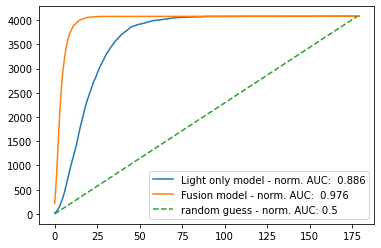

In [23]:
# title = "Cumulative angular error on " + dataset_name + " dataset - light only VS fusion - FT10"
title = "Cumulative angular error on " + dataset_name + " dataset - light only VS fusion"
# title = "Cumulative angular error on " + dataset_name + " dataset"
# plt.title(title)


x = []
auc = []
for j in range(len(file_paths)):
    x.append(np.array([angular_err[i][j] for i in angular_err.keys()]))
    auc.append(np.sum(x[-1]) / (n_imgs * 180.0))
    
x = np.array(x)

for i in range(len(file_paths)):
    plt.plot(x[i])
    # plt.step(np.arange(180), x[i])
    
plt.plot(np.linspace(0, n_imgs * (1-normalize) + normalize, 179),"--")
         
plt.legend(["Light only model - norm. AUC: {:6.3f}".format(auc[0]), 
            "Fusion model - norm. AUC: {:6.3f}".format(auc[1]),
            "random guess - norm. AUC: 0.5"])

# plt.legend(["no FT - norm. AUC: {:6.3f}".format(auc[0]), 
#             "FT 20 epochs - norm. AUC: {:6.3f}".format(auc[1]),
#             "FT 50 epochs - norm. AUC: {:6.3f}".format(auc[2]),
#             "random guess - norm. AUC: 0.5"])

# plt.savefig("graph.pdf", bbox_inches="tight", dpi=600)
plt.savefig("graph.pdf", bbox_inches="tight")
plt.show()
plt.close()

